Basic maps/analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl

In [4]:
df = pl.read_parquet("../data/2024-citsci-pollutants.parquet")

In [5]:
# Ensure timestamp is parsed as datetime
df = df.with_columns(pl.col("timestamp").str.strptime(pl.Datetime))

In [6]:
df.head()

timestamp,P1,P2,lat,lon,sensor_id
datetime[μs],f64,f64,f64,f64,i64
2024-03-28 00:00:40,14.9,10.93,52.508,13.422,9392
2024-03-28 00:03:41,16.17,12.1,52.508,13.422,9392
2024-03-28 00:06:43,13.1,12.1,52.508,13.422,9392
2024-03-28 00:09:45,12.8,11.63,52.508,13.422,9392
2024-03-28 00:12:46,12.57,11.7,52.508,13.422,9392


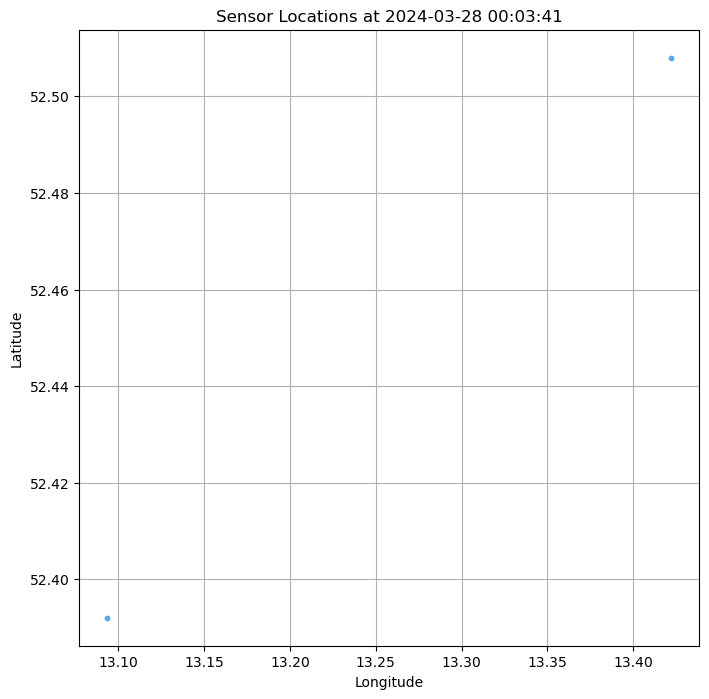

In [ ]:
# Filter to that timestamp - may need to quantize times....
ts = "2024-03-28 00:03:41"
ts_dt = pl.datetime(2024, 3, 28, 0, 3, 41)
snapshot = df.filter(pl.col("timestamp") == ts_dt)

plt.figure(figsize=(8, 8))
plt.scatter(snapshot["lon"], snapshot["lat"], c="dodgerblue", s=10, alpha=0.7)
plt.title(f"Sensor Locations at {ts}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()